# Machine Learning parte 1 Otimização de modelos através de hiperparâmetros

## Objetivos
* Entenda o que são hiperparâmetros e os espaços de parâmetros
* Explore espaços de forma determinística
* Otimize seus modelos
* Evite o overfit
* Implemente a exploração por trás dos panos
* Aprenda a utilizar a explorar com o GridSearchCV
* Nested cross validation

link: https://cursos.alura.com.br/course/machine-learning-otimizacao-de-modelos-atraves-de-hiperparametros

## Importando as bibliotecas

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, train_test_split, KFold, GroupKFold, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Importando o dataset e explorando os dados

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

df = pd.read_csv(uri, index_col=0)
df.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [12]:
X = df.drop('vendido', axis=1)
y = df['vendido']

seed = 301
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [15]:
df_azar = df.sort_values('vendido')
X_azar = df_azar.drop('vendido', axis=1)
y_azar = df_azar['vendido']

df_azar

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704
...,...,...,...,...
5491,71910.43,1,9,25778.40812
1873,30456.53,1,6,15468.97608
1874,69342.41,1,11,16909.33538
5499,70520.39,1,16,19622.68262


In [16]:
seed = 301
np.random.seed(seed)

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
accuracy = dummy.score(X_test, y_test)

print(f'A Acurácia do modelo dummy stratified é: {accuracy:0.2%}')

A Acurácia do modelo dummy stratified é: 58.00%


In [17]:
def imprime_resultados(results, cv):
    results_media = results['test_score'].mean()
    results_std = results['test_score'].std()
    print(f'A média é das acurácias é: {results_media:0.2%}')
    print(f'A Acurácia do modelo para cv = {cv} é: [{results_media - 2 * results_std:0.2%} {results_media + 2 * results_std:0.2%}]')

In [19]:
SEED = 301
np.random.seed(SEED)

k = 5
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X, y, cv=k)
imprime_resultados(results, k)

A média é das acurácias é: 75.78%
A Acurácia do modelo para cv = 5 é: [75.21% 76.35%]


In [28]:
SEED = 301
np.random.seed(SEED)

k=10
cv = KFold(n_splits=k, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X, y, cv=cv)
imprime_resultados(results, k)

A média é das acurácias é: 75.76%
A Acurácia do modelo para cv = 10 é: [73.26% 78.26%]


In [31]:
num_aleatorios = np.random.randint(-2,3, size=10000)
df['modelo'] = df['idade_do_modelo'] + num_aleatorios
df['modelo'] = df['modelo'] + abs(df['modelo'].min()) + 1
df.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [32]:
SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])
k=10
cv = GroupKFold(n_splits=k)
results = cross_validate(pipeline, X_azar, y_azar, cv=cv, groups=df['modelo'])
imprime_resultados(results, k)

A média é das acurácias é: 76.68%
A Acurácia do modelo para cv = 10 é: [74.28% 79.08%]


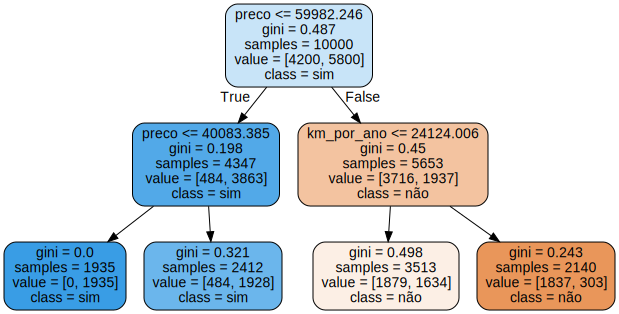

In [39]:
from sklearn.tree import export_graphviz
import graphviz

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(X_azar, y_azar)
features = X_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], 
                feature_names =  features)

graph = graphviz.Source(dot_data)
graph

In [44]:
SEED = 301
np.random.seed(SEED)

k=10
cv = KFold(n_splits=k, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X, y, cv=cv)
imprime_resultados(results, k)def treinar_arvore_de_decisao(max_depth, min_samples_leaf, min_saples_split):
    SEED = 301
    np.random.seed(SEED)

    k=10
    cv = KFold(n_splits=k, shuffle=True)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_saples_split=min_saples_split)
    results = cross_validate(modelo, X, y, cv=cv, return_train_score=True)
    tabela = [max_depth, min_samples_leaf, 
              round(results['train_score'].mean()*100, 2), round(results['test_score'].mean()*100, 2),
              ]
    return tabela

resultados = []
for i in range(1, 33):
    for j in range(32, 64, 128, 256):
        resultados.append(treinar_arvore_de_decisao(i, j))
resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf','train', 'test'])
resultados.head()

A média é das acurácias é: 75.76%
A Acurácia do modelo para cv = 10 é: [73.26% 78.26%]


{'fit_time': array([0.00800157, 0.00800014, 0.00899792, 0.00800037, 0.00899887,
        0.00899935, 0.01000047, 0.00899911, 0.00900173, 0.01000118]),
 'score_time': array([0.00299931, 0.00300074, 0.00200129, 0.00200081, 0.00300145,
        0.00300121, 0.00200033, 0.00199914, 0.00199938, 0.00300121]),
 'test_score': array([0.749, 0.757, 0.763, 0.762, 0.768, 0.754, 0.744, 0.733, 0.778,
        0.768]),
 'train_score': array([0.75888889, 0.758     , 0.75733333, 0.75744444, 0.75677778,
        0.75833333, 0.75933333, 0.76066667, 0.75566667, 0.75677778])}

### Explorando os hyper parametros para uma decisão

In [105]:
def treinar_arvore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    k=10
    cv = KFold(n_splits=k, shuffle=True)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, X, y, cv=cv, return_train_score=True)
    tabela = [max_depth, round(results['train_score'].mean()*100, 2), round(results['test_score'].mean()*100, 2)]
    return tabela
resultados = [treinar_arvore_de_decisao(k) for k in range(1, 40)]
resultados = pd.DataFrame(resultados, columns=['max_depth', 'train', 'test'])

In [106]:
resultados.sort_values('test', ascending=False).head(10)

,max_depth,train,test
2,3,78.75,78.67
3,4,78.80,78.59
4,5,78.93,78.57
5,6,79.19,78.30
7,8,79.83,77.99
6,7,79.44,77.86
9,10,80.94,77.54
8,9,80.30,77.42
10,11,81.67,77.00
11,12,82.53,76.65


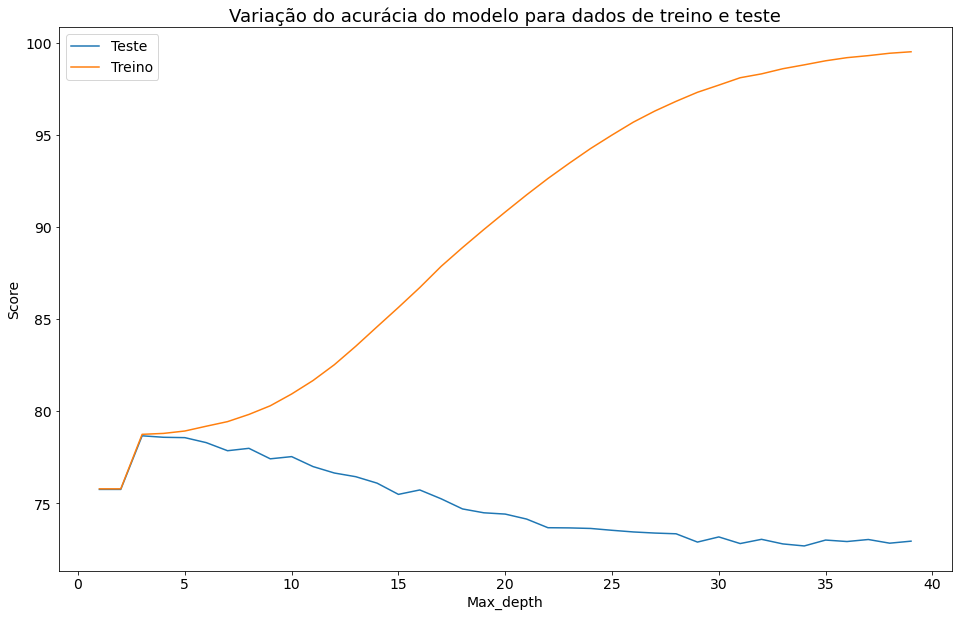

In [69]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='max_depth', y='test', data=resultados, ax=ax)
sns.lineplot(x='max_depth', y='train', data=resultados, ax=ax)
ax.legend(['Teste', 'Treino'], fontsize=14)
ax.tick_params(labelsize=14)
ax.set_xlabel('Max_depth', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Variação do acurácia do modelo para dados de treino e teste', fontsize=18)

plt.show()

### Explorando os hyper parametros para 2 parametros

In [75]:
def treinar_arvore_de_decisao(max_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)

    k=10
    cv = KFold(n_splits=k, shuffle=True)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(modelo, X, y, cv=cv, return_train_score=True)
    tabela = [max_depth, min_samples_leaf, 
              round(results['train_score'].mean()*100, 2), round(results['test_score'].mean()*100, 2)]
    return tabela

resultados = []
for i in range(1, 33):
    for j in range(1, 33):
        resultados.append(treinar_arvore_de_decisao(i, j))
resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf','train', 'test'])

In [76]:
resultados.head()

,max_depth,min_samples_leaf,train,test
0,1,1,75.79,75.76
1,1,2,75.79,75.76
2,1,3,75.79,75.76
3,1,4,75.79,75.76
4,1,5,75.79,75.76


In [86]:
resultados.sort_values('test', ascending=False).head(10)

,max_depth,min_samples_leaf,train,test
70,3,7,78.75,78.67
64,3,1,78.75,78.67
75,3,12,78.75,78.67
71,3,8,78.75,78.67
73,3,10,78.75,78.67
74,3,11,78.75,78.67
95,3,32,78.75,78.67
94,3,31,78.75,78.67
93,3,30,78.75,78.67
92,3,29,78.75,78.67


In [87]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-3.757177e-16,0.683230,-0.639629
min_samples_leaf,-3.757177e-16,1.000000e+00,-0.449044,0.396058
train,6.832302e-01,-4.490438e-01,1.000000,-0.754665
test,-6.396287e-01,3.960579e-01,-0.754665,1.000000


<AxesSubplot:>

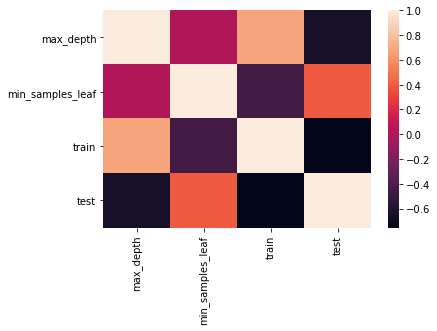

In [88]:
sns.heatmap(corr)

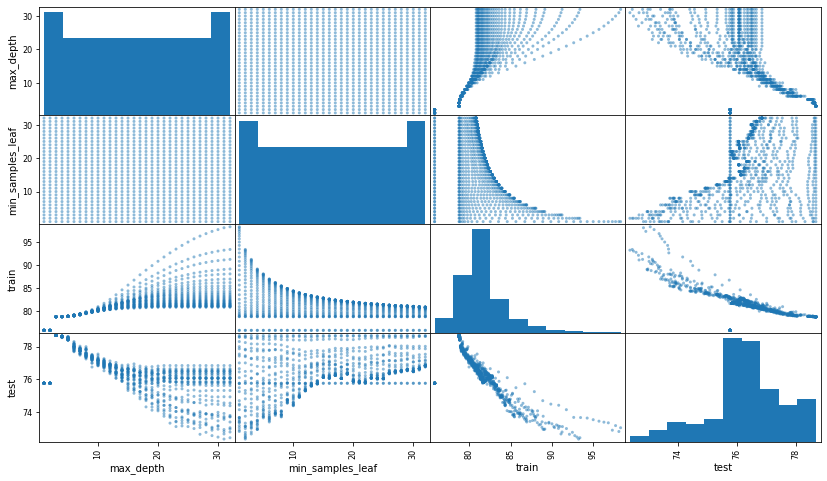

In [97]:
pd.plotting.scatter_matrix(resultados, figsize=(14,8), alpha=0.5)
plt.show()

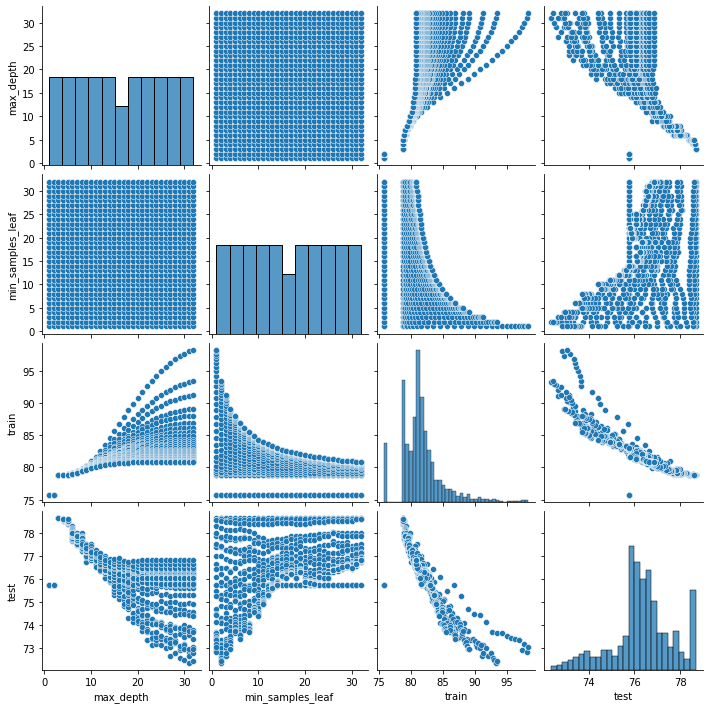

In [101]:
sns.pairplot(resultados)
plt.show()

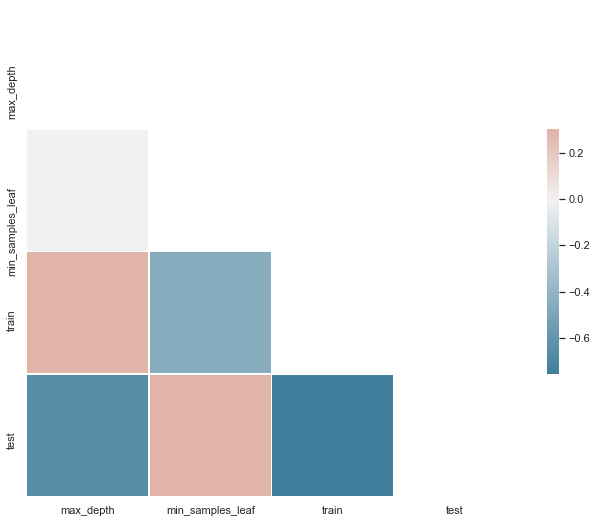

In [104]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Explorando os hyper parametros para 3 parametros

In [ ]:
def treinar_arvore_de_decisao(max_depth, min_samples_leaf, min_saples_split):
    SEED = 301
    np.random.seed(SEED)

    k=10
    cv = KFold(n_splits=k, shuffle=True)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_saples_split=min_saples_split)
    results = cross_validate(modelo, X, y, cv=cv, return_train_score=True)
    tabela = [max_depth, min_samples_leaf, 
              round(results['train_score'].mean()*100, 2), round(results['test_score'].mean()*100, 2),
              ]
    return tabela

resultados = []
for i in range(1, 33):
    for j in range(32, 64, 128, 256):
        resultados.append(treinar_arvore_de_decisao(i, j))
resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf','train', 'test'])
resultados.head()

In [110]:
def treinar_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)

    k=10
    cv = KFold(n_splits=k,=True)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    results = cross_validate(modelo, X, y, cv=cv, return_train_score=True)
    tabela = [max_depth, min_samples_leaf, min_samples_split, 
              round(results['train_score'].mean()*100, 2), round(results['test_score'].mean()*100, 2),
              results['fit_time'].mean(), results['score_time'].mean()]
    return tabela

resultados = []
for i in range(1, 33):
    for j in [32, 64, 128, 256]:
        for k in [32, 64, 128, 256]:
            resultados.append(treinar_arvore_de_decisao(i, j, k))
resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'min_samples_split', 'train', 
                                               'test', 'fit_time', 'score_time'])
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.79,75.76,0.006400,0.002202
1,1,32,64,75.79,75.76,0.006400,0.002001
2,1,32,128,75.79,75.76,0.006301,0.002100
3,1,32,256,75.79,75.76,0.006100,0.002400
4,1,64,32,75.79,75.76,0.006101,0.002201


In [111]:
resultados.sort_values('test', ascending=False)

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
59,4,128,256,78.75,78.67,0.013501,0.002400
52,4,64,32,78.75,78.67,0.013501,0.002400
34,3,32,128,78.75,78.67,0.011301,0.002401
35,3,32,256,78.75,78.67,0.010300,0.002401
36,3,64,32,78.75,78.67,0.010901,0.002700
...,...,...,...,...,...,...,...
29,2,256,64,75.79,75.76,0.009302,0.002600
30,2,256,128,75.79,75.76,0.009300,0.002400
31,2,256,256,75.79,75.76,0.008900,0.002501
1,1,32,64,75.79,75.76,0.006400,0.002001


In [112]:
corr = resultados.corr()

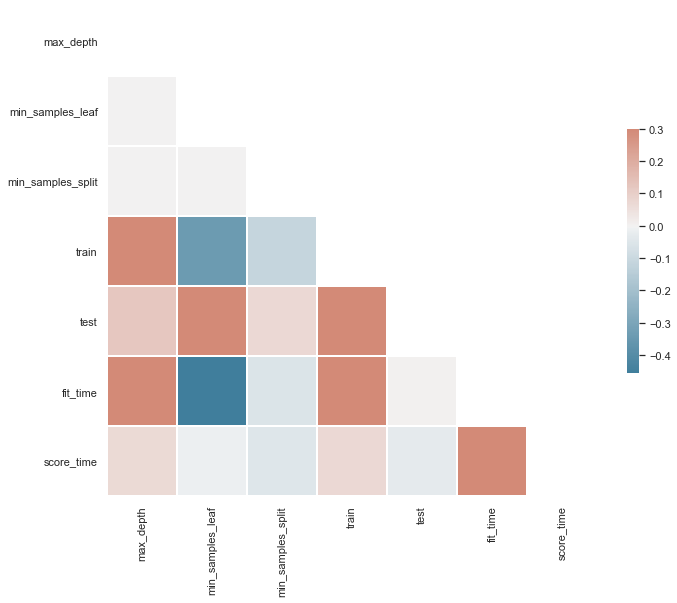

In [113]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Explorando o espaço de hyper parametros com GridSearchCV

In [118]:
seed = 301
np.random.seed(seed)

param_grid = {'max_depth': [3, 5],
              'min_samples_split': [32, 64, 128],
              'min_samples_leaf': [32, 64, 128],
              'criterion': ['gini', 'entropy']} 
modelo = DecisionTreeClassifier()

clf = GridSearchCV(modelo, param_grid,
                   cv=GroupKFold(n_splits=10))
clf.fit(X_azar, y_azar, groups=df['modelo'])
resultados = pd.DataFrame(clf.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0105,0.000922,0.002201,0.000400,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.0103,0.000900,0.002401,0.000490,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.0107,0.001269,0.002201,0.000400,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.0112,0.001249,0.002000,0.000447,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.0129,0.005413,0.003701,0.004124,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [123]:
print(clf.best_params_)
print(clf.best_score_ *100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [129]:
model = clf.best_estimator_
model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [1]:
# Evitar essa abordagem, pois está sendo otimista e os dados estão sendo testados com dados já conhecidos

y_pred = model.predict(X_azar)
results = accuracy_score(y_azar, y_pred)
print(f'{results:0.2%}')

NameError: name 'model' is not defined

## Como ter uma estimativa sem esse vicio nos dados que eu já vi?
No caso de cross-validation com busca de hiper parametros, fazemos uma nova validação cruzada. Chama-se nested cross validation (**cross_val_score**)

In [137]:
scores =  cross_val_score(clf, X_azar, y_azar, cv=GroupKFold(n_splits=10), groups=df['modelo'])

C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1296, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 809, in evaluate_candidates
    enume

### Devido a um bug no pandas não é possível prever os resultados para novos grupos

In [138]:
seed = 301
np.random.seed(seed)

param_grid = {'max_depth': [3, 5],
              'min_samples_split': [32, 64, 128],
              'min_samples_leaf': [32, 64, 128],
              'criterion': ['gini', 'entropy']} 
modelo = DecisionTreeClassifier()

clf = GridSearchCV(modelo, param_grid,
                   cv=KFold(n_splits=5, shuffle=True))
clf.fit(X_azar, y_azar)
resultados = pd.DataFrame(clf.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010400,0.001356,0.002401,4.898249e-04,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.010601,0.001020,0.002000,8.476443e-07,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.009201,0.000400,0.002000,6.331638e-04,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.010600,0.001201,0.002401,8.008962e-04,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.011001,0.000894,0.002401,4.902135e-04,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [142]:
scores =  cross_val_score(clf, X_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
scores

array([0.7915, 0.779 , 0.778 , 0.792 , 0.7935])

In [145]:
scores_mean = scores.mean()
score_std = scores.std()
print(f'Média da acurácia: {scores_mean}')
print(f'Intervalo da acurácia: [{scores_mean - 2 * score_std:0.2%} {scores_mean + 2 * score_std:0.2%}]')

Média da acurácia: 0.7868
Intervalo da acurácia: [77.32% 80.04%]


In [149]:
best = clf.best_estimator_
best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

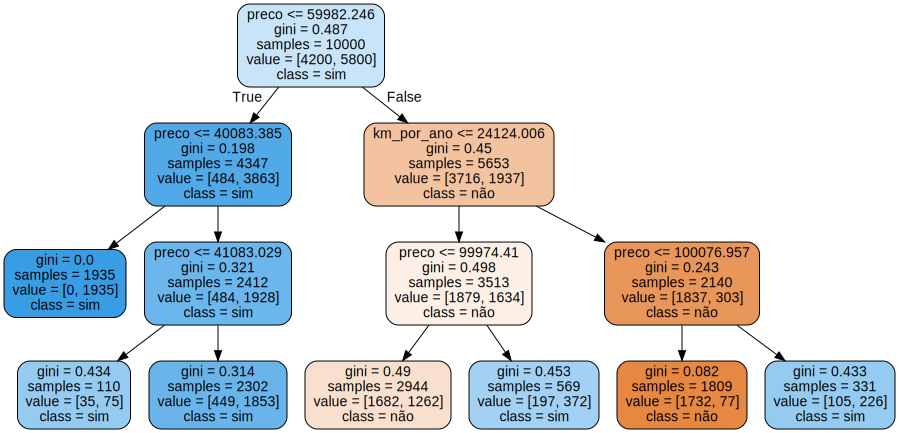

In [150]:
from sklearn.tree import export_graphviz
import graphviz

features = X_azar.columns
dot_data = export_graphviz(best, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], 
                feature_names =  features)

graph = graphviz.Source(dot_data)
graph